Derivada: 2 x + 3

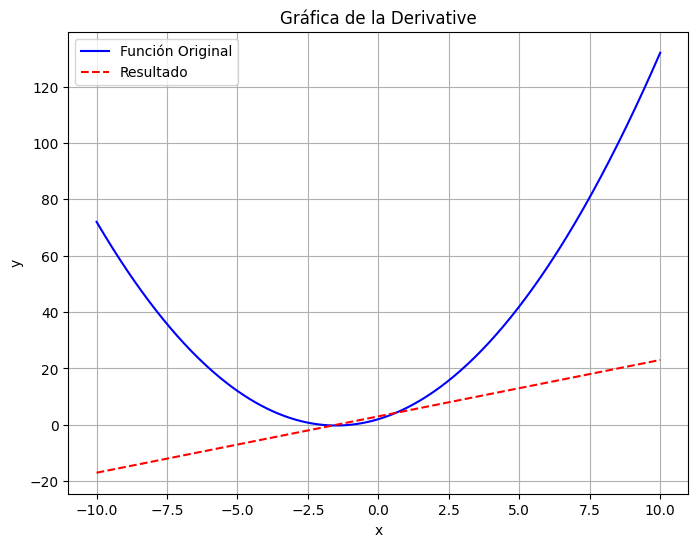

In [3]:
html_code = """
<html>
  <head>
    <link href="https://cdn.jsdelivr.net/npm/bootstrap@5.1.0/dist/css/bootstrap.min.css" rel="stylesheet">
  </head>
  <body>
    <div class="container">
      <h2 class="mt-5">Calculadora de Derivadas e Integrales</h2>
      <form id="calc_form" class="mt-4">
        <div class="mb-3">
          <label for="func" class="form-label">Introduce la función (en términos de x):</label>
          <input type="text" class="form-control" id="func" name="func" value="x**2 + 3*x + 2">
        </div>

        <div class="mb-3">
          <label for="operation" class="form-label">Seleccione una operación:</label>
          <select class="form-select" id="operation" name="operation">
            <option value="derivative">Derivada</option>
            <option value="integral">Integral</option>
          </select>
        </div>

        <button type="button" class="btn btn-primary" onclick="executeCalculation()">Calcular</button>
      </form>

      <h3 class="mt-4">Resultado:</h3>
      <div id="result"></div>
      <h3>Gráfica:</h3>
      <div id="graph"></div>
    </div>

    <script>
      function executeCalculation() {
        const func = document.getElementById("func").value;
        const operation = document.getElementById("operation").value;
        google.colab.kernel.invokeFunction('notebook.calculate', [func, operation], {});
      }
    </script>
  </body>
</html>
"""
display(HTML(html_code))


In [4]:
def calculate(function_str, operation):
    try:
        x = sp.symbols('x')

        # Convertir la cadena de texto en una expresión simbólica
        func = sp.sympify(function_str)

        # Verificar si la operación es derivada o integral
        if operation == 'derivative':
            result = sp.diff(func, x)
            result_str = f"Derivada: {sp.latex(result)}"
        elif operation == 'integral':
            result = sp.integrate(func, x)
            result_str = f"Integral: {sp.latex(result)}"
        else:
            raise ValueError("Operación no válida")

        # Mostrar resultado en Markdown
        display(Markdown(result_str))

        # Graficar la función original y el resultado
        x_vals = np.linspace(-10, 10, 400)
        y_vals = np.array([float(func.subs(x, val)) for val in x_vals])
        y_vals_result = np.array([float(result.subs(x, val)) for val in x_vals])

        plt.figure(figsize=(8, 6))
        plt.plot(x_vals, y_vals, label="Función Original", color="blue")
        plt.plot(x_vals, y_vals_result, label="Resultado", color="red", linestyle='dashed')
        plt.legend()
        plt.title(f"Gráfica de la {operation.capitalize()}")
        plt.xlabel("x")
        plt.ylabel("y")
        plt.grid(True)
        plt.show()

    except Exception as e:
        display(Markdown(f"**Error**: {str(e)}"))
import plotly.graph_objects as go

def plot_graph(x_vals, y_vals, y_vals_result, operation):
    fig = go.Figure()

    # Función original
    fig.add_trace(go.Scatter(x=x_vals, y=y_vals, mode='lines', name="Función Original"))

    # Resultado (derivada o integral)
    fig.add_trace(go.Scatter(x=x_vals, y=y_vals_result, mode='lines', name=f"{operation.capitalize()} (Resultado)", line=dict(dash='dash')))

    # Estilo del gráfico
    fig.update_layout(
        title=f"Gráfica de la {operation.capitalize()}",
        xaxis_title="x",
        yaxis_title="y",
        template="plotly_dark"
    )
    fig.show()

